In [1]:
import numpy as np

import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, RandomFlip, RandomRotation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### LOADING THE IMAGES

#### From the train dataset taking the 80% for training

In [2]:
train = tf.keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\Amiran\Desktop\my-projects\Alien vs Predator Image Classification with CNN\data\train",
    validation_split = 0.20,
    subset = 'training',
    label_mode = 'categorical',
    seed = 123,
    image_size = (224,224),
    batch_size = 32)

Found 694 files belonging to 2 classes.
Using 556 files for training.


#### From the train dataset taking the 20% for testing

In [3]:
test = tf.keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\Amiran\Desktop\my-projects\Alien vs Predator Image Classification with CNN\data\train",
    validation_split = 0.20,
    subset = 'validation',
    label_mode = 'categorical',
    seed = 123,
    image_size = (224,224),
    batch_size = 32)

Found 694 files belonging to 2 classes.
Using 138 files for validation.


#### From the validation dataset taking 100% for evaluation of the model

In [4]:
evaluation = tf.keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\Amiran\Desktop\my-projects\Alien vs Predator Image Classification with CNN\data\validation",
    label_mode = 'categorical',
    seed = 123,
    image_size = (224,224),
    batch_size = 32)

Found 200 files belonging to 2 classes.


#### Class Names

In [5]:
class_names = train.class_names

print(class_names)

['alien', 'predator']


### VIZUALIZING THE IMAGES

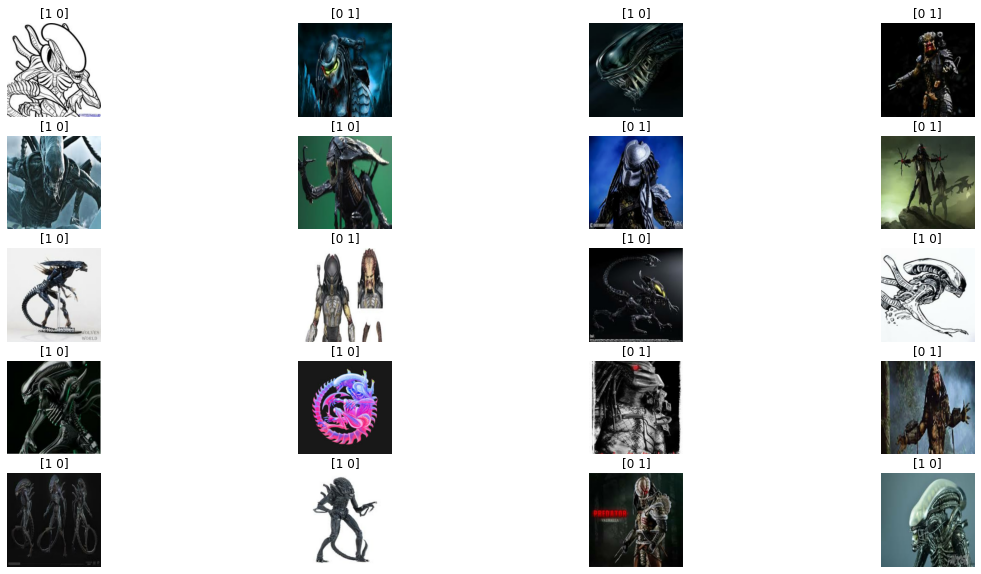

In [6]:
plt.figure(figsize=[20,10])

for image_batch, label_batch in train.take(1):
    
    for i in range(20):
        
        ax = plt.subplot(5, 4, i+1)
        
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        
        plt.title(label_batch[i].numpy().astype('uint8'))
        
        plt.axis("off")

### CREATING THE CNN MODEL

#### Preprocess the data - Normalizing

In [7]:
def scale(image, label):
    
    image = tf.cast(image, tf.float32)
    
    image /= 255.0
    
    return image, label

train = train.map(scale)

test = test.map(scale)

evaluation = evaluation.map(scale)

#### Building the model

In [8]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', verbose=1, factor=0.2, min_lr=0.00001)

early_stop = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

callbacks = [reduce_lr, early_stop]

model = keras.Sequential([

    keras.layers.InputLayer(input_shape=(224, 224, 3)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train, batch_size=128, validation_data=test, epochs=100, callbacks=callbacks)

print('\n')

test_loss, test_acc = model.evaluate(evaluation)

print('\nEvaluation accuracy:', test_acc)

Epoch 1/100
18/18 [==============================] - 64s 3s/step - loss: 0.8485 - accuracy: 0.5396 - val_loss: 0.6673 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
18/18 [==============================] - 59s 3s/step - loss: 0.6534 - accuracy: 0.5935 - val_loss: 0.6463 - val_accuracy: 0.6232 - lr: 0.0010
Epoch 3/100
18/18 [==============================] - 59s 3s/step - loss: 0.6400 - accuracy: 0.5809 - val_loss: 0.6325 - val_accuracy: 0.7319 - lr: 0.0010
Epoch 4/100
18/18 [==============================] - 59s 3s/step - loss: 0.6731 - accuracy: 0.5809 - val_loss: 0.6430 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
18/18 [==============================] - 59s 3s/step - loss: 0.6354 - accuracy: 0.6259 - val_loss: 0.6261 - val_accuracy: 0.6159 - lr: 0.0010
Epoch 6/100
18/18 [==============================] - 59s 3s/step - loss: 0.6088 - accuracy: 0.6673 - val_loss: 0.5066 - val_accuracy: 0.7681 - lr: 0.0010
Epoch 7/100
18/18 [==============================] - 59s 3s/step - loss: 0.5

#### Model Vizualization

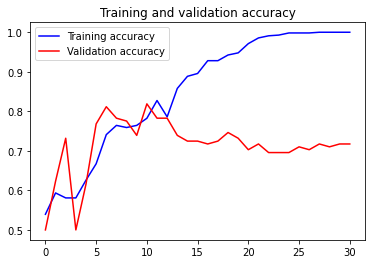

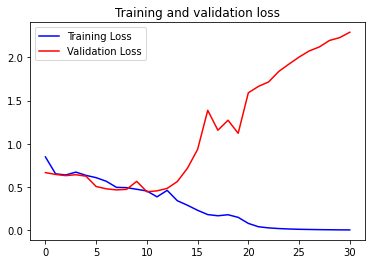

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### PREDICTIONS

In [10]:
print(class_names)

['alien', 'predator']


In [11]:
dir1 = r"C:\Users\Amiran\Desktop\my-projects\Alien vs Predator Image Classification with CNN\data\validation\alien\\"

dir2 = r"C:\Users\Amiran\Desktop\my-projects\Alien vs Predator Image Classification with CNN\data\validation\predator\\"

In [12]:
import os

alien_list = os.listdir(dir1)

predator_list = os.listdir(dir2)

#### Alien

In [13]:
correct_alien = []

incorrect_alien = []

for alien in alien_list:
    
    img = tf.keras.preprocessing.image.load_img(dir1 + alien, target_size = (224, 224, 3))
    
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    img_array = tf.expand_dims(img_array, 0)
    
    predict = model.predict(img_array)
    
    if round(predict[0][0]) == 1.0:
        print(f'{alien}, CORRECT')
        correct_alien.append(alien)
    else:
        print(f'{alien}, NOT')
        incorrect_alien.append(alien)
        
print('\n')
print(f'correct predictions {len(correct_alien)}')
print(f'incorrect predictions {len(incorrect_alien)}')

1/1 [==============================] - 0s 314ms/step
0.jpg, CORRECT
1/1 [==============================] - 0s 151ms/step
1.jpg, CORRECT
1/1 [==============================] - 0s 82ms/step
10.jpg, CORRECT
1/1 [==============================] - 0s 98ms/step
11.jpg, NOT
1/1 [==============================] - 0s 108ms/step
12.jpg, CORRECT
1/1 [==============================] - 0s 92ms/step
13.jpg, CORRECT
1/1 [==============================] - 0s 79ms/step
14.jpg, CORRECT
1/1 [==============================] - 0s 59ms/step
15.jpg, CORRECT
1/1 [==============================] - 0s 59ms/step
16.jpg, CORRECT
1/1 [==============================] - 0s 58ms/step
17.jpg, CORRECT
1/1 [==============================] - 0s 64ms/step
18.jpg, CORRECT
1/1 [==============================] - 0s 78ms/step
19.jpg, NOT
1/1 [==============================] - 0s 106ms/step
2.jpg, NOT
1/1 [==============================] - 0s 62ms/step
20.jpg, CORRECT
1/1 [==============================] - 0s 47ms/step
21.jpg,

#### Predator

In [14]:
correct_predator = []

incorrect_predator = []

for predator in predator_list:
    
    img = tf.keras.preprocessing.image.load_img(dir2 + predator, target_size = (224, 224, 3))
    
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    img_array = tf.expand_dims(img_array, 0)
    
    predict = model.predict(img_array)
    
    if round(predict[0][0]) == 0.0:
        print(f'{predator}, CORRECT')
        correct_predator.append(predator)
    else:
        print(f'{predator}, NOT')
        incorrect_predator.append(predator)
        
print('\n')
print(f'correct predictions {len(correct_predator)}')
print(f'incorrect predictions {len(incorrect_predator)}')

1/1 [==============================] - 0s 68ms/step
0.jpg, NOT
1/1 [==============================] - 0s 59ms/step
1.jpg, CORRECT
1/1 [==============================] - 0s 64ms/step
10.jpg, CORRECT
1/1 [==============================] - 0s 59ms/step
11.jpg, CORRECT
1/1 [==============================] - 0s 67ms/step
12.jpg, CORRECT
1/1 [==============================] - 0s 67ms/step
13.jpg, CORRECT
1/1 [==============================] - 0s 67ms/step
14.jpg, CORRECT
1/1 [==============================] - 0s 75ms/step
15.jpg, CORRECT
1/1 [==============================] - 0s 61ms/step
16.jpg, CORRECT
1/1 [==============================] - 0s 61ms/step
17.jpg, CORRECT
1/1 [==============================] - 0s 72ms/step
18.jpg, CORRECT
1/1 [==============================] - 0s 79ms/step
19.jpg, CORRECT
1/1 [==============================] - 0s 59ms/step
2.jpg, CORRECT
1/1 [==============================] - 0s 62ms/step
20.jpg, CORRECT
1/1 [==============================] - 0s 64ms/step
21.

### Alien correct predictions 52/100
### Predator correct predictions 87/100